# 1. Introduction

This set of *R warm-ups* provides practice with probability
distributions.

## 1.1. Preparation

Since R is oriented toward statistics, no special preparation is
required to work with distributions.
You can obtain a list of *baked-in* distributions by entering

```
?Distributions
```

These are all part of the **stats** package which is available
in every R installation.

## 1.2 Conventions

R has a consistent naming convention for functions that work
with distributions - a single letter followed by the name of
the distribution.  The four single letters are

* `d` - density function
* `p` - percent point function (CDF)
* `q` - quantile (inverse of CDF)
* `r` - random sampler

If we take the binomial distribution as an example, then
`dbinom` is a *binomial density function*.

Throughout this tutorial we'll use the **round** function
to limit the size of the output to two or three decimal points.
It has the syntax of

```
round(x, 3)
```

where `x` is the number or vector you wish to round and `3`
is the number of digits to the left of the decimal point.
This is not required as you follow along.  It's simply done
here for the notebook presentation.

In [1]:
x <- dbinom(4, 10, 0.3)
round(x, 3)

[1] 0.2

This gives the probability of getting **4** successes after **10**
bernoulli trials where each success has a probability of **0.3**;
which is about **20%**.

# 2 Discrete Distributions

## 2.1 Binomial Distribution

The binomial distribution has a `binom` suffix for each of
its standard methods.  We'll assume 100 trials with 20%
chance of success at each trial.  The value of the random
variable is the number of successes.
Let's start with the density function `dbinom`.
This is equation (7) of the math supplement.

$$
f_X(i) = \sum_{i=0}^n {n \choose i} p^i (1-p)^{n-i}
$$

Here we consider the case of $n=100$ and $p=0.2$.
We suspect that the highest probability will be around 20
successes since the probability of each success is 0.2 and
there are 100 trials.  The `dbinom` function accepts numeric
vectors, so we'll check `10`, `20`, and `30` in one go.

In [2]:
x <- dbinom(c(10, 20, 30), 100, 0.2)
round(x, 3)

[1] 0.003 0.099 0.005

Sure enough, the density functon shows a 9.9% chance of
obtaining exactly 20 successes.  The probability for 10
and 30 are each less than 1%.

Now let's check the associated cumulative distribution
function, or CDF.  The CDF at a point is the cumulation
of probability from the density function for all points
equal or less.  Since we expect the average to be around
20, the CDF should be close to 0.5 at 20.

In [3]:
x <- pbinom(c(10, 20, 30), 100, 0.2)
round(x, 3)

[1] 0.006 0.559 0.994

This shows that the probability of having *less than or equal
to 10 successes* is 0.6%.  The probability of having less
than or equal to 30 successes is 99.4%.

To better see the relationship between the probability density
(PDF) and cumulative distribution (CDF), we can plot them.

In [4]:
options(repr.plot.width=6, repr.plot.height=4) # For jupyter notebooks.

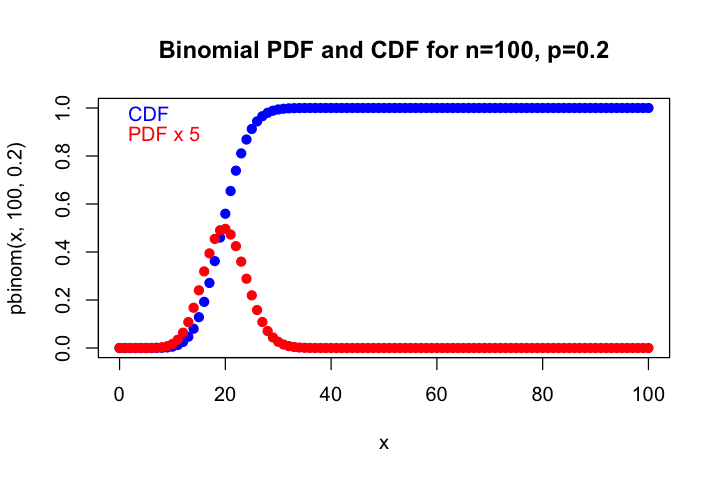

In [5]:
x <- seq(0, 100)
plot(x, pbinom(x, 100, 0.2), col="blue", pch=19)
points(x, dbinom(x, 100, 0.2)*5, col="red", pch=19)
title(main="Binomial PDF and CDF for n=100, p=0.2")
legend('topleft', c('CDF', 'PDF x 5'), text.col=c('blue', 'red'),
       bty='n', y.intersp=2)

The PDF was scaled by 5 so that we could discern its shape better.

**Quantiles** are the inverse of the CDF function.  For any
probability, a quantile function tells us the value of the
random variable for which the CDF is equal to that probability.

How many successes can we expect to have 25%, 50%, and 75%
of the time?

In [6]:
qbinom(c(0.25, 0.5, 0.75), 100, 0.2)

[1] 17 20 23

The reason these come out to exact integers is because the
binomial random variable only takes integer values.  The
`qbinom` can be interpreted as *the smallest integer number
of successes with probability greater than or equal to the
argument*.  So it's not a strict inverse in the discrete
case.

The binomial CDF is provided by `pbinom`. 

In [7]:
x <- pbinom(c(16, 17, 19, 20, 22, 23), 100, 0.2)
round(x, 3)

[1] 0.192 0.271 0.460 0.559 0.739 0.811

Sometimes it's useful to generate samples from a distribution.
In other words, the numbers are generated as if they came
from running the experiement associated with the model.
The `rbinom` function is used for this.

In [8]:
b_sample <- rbinom(1000, 100, 0.2)
b_sample[1:100]

[1] 20 11 20 25 25 21 16 16 23 15 24 15 19 22 24 19 21 19 21 20 18 22 23 20 24
 [26] 16 22 15 18 18 21 18 19 27 23 18 19 22 19 19 20 25 26 10 16 18 20 24 18 20
 [51] 24 18 23 28 24 20 17 21 22 23 23 23 20 21 21 18 21 15 22 25 22 23 25 19 20
 [76] 25 17 27 18 18 17 15 23 13 24 21 16 20 24 13 23 23 21 19 20 16 21 28 21 23

This simulates the arduous task of 

1. flipping an unfair coin (with 20% chance of heads) 100 times,
2. noting the number of heads,
3. repeating steps 1 and 2 for 1,000 times

It's fun to plot a histogram of our sample.  It should have a
shape "approaching" our density function.

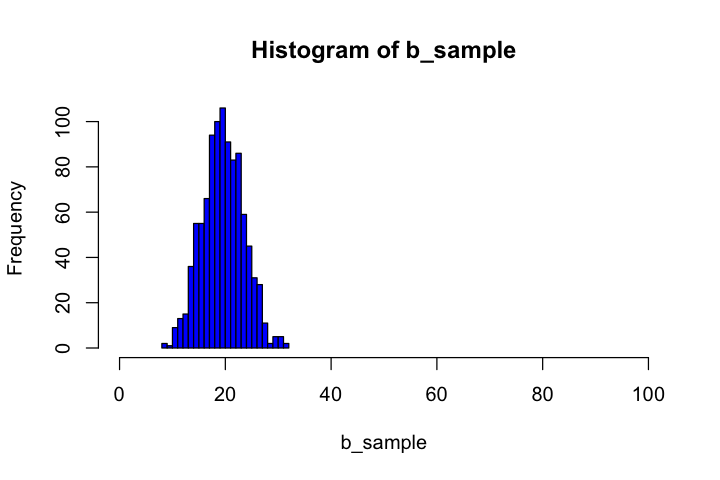

In [9]:
hist(b_sample, breaks=30, xlim=c(0, 100), col="blue")

The `xlim` parameter allows us to explicitly determine the range of
x values on the plot.

## 2.2 Poisson Distribution

The Poisson random variable represents the number of occurrences of an event
over a fixed interval of time.
An example could be the number of crimes reported per day.
The parameter of the random variable, usually
denoted by $\lambda$, turns out to be the expected number of occurrences.
The Poisson density function is given by

$$
f_X(i;\lambda) = e^{-\lambda} \frac{\lambda^i}{i!}
$$

For each $i$, this represents the probability of observing $i$ counts within
the unit time period.  R provides the usual four random variable functions
for the Poisson random variable.

* `dpois` - Poisson density (PMF) function
* `ppois` - Poisson probability (CDF) function
* `qpois` - Poisson quantile (inverse CDF) function
* `rpois` - Poisson random sample

Let's consider a case of a Poisson process where the expected
number of occurrences per time period is 5.

Since 5 is the expected value, we expect the mass function to be strong
near 5.  Let's check this.

In [10]:
x <- dpois(c(3, 5, 7), 5)
round(x, 3)

[1] 0.140 0.175 0.104

We see a 14% of getting a 3 count, an 18% chance of getting a 5 count
and a 10% chance of getting a 7 count.  Now let's check the cumulative
distribution function.

In [11]:
x <- ppois(c(3, 5, 7), 5)
round(x, 3)

[1] 0.265 0.616 0.867

The chance of getting

* 3 or less is 27%
* 5 or less is 62%
* 7 or less is 87%

Let's view this graphically.

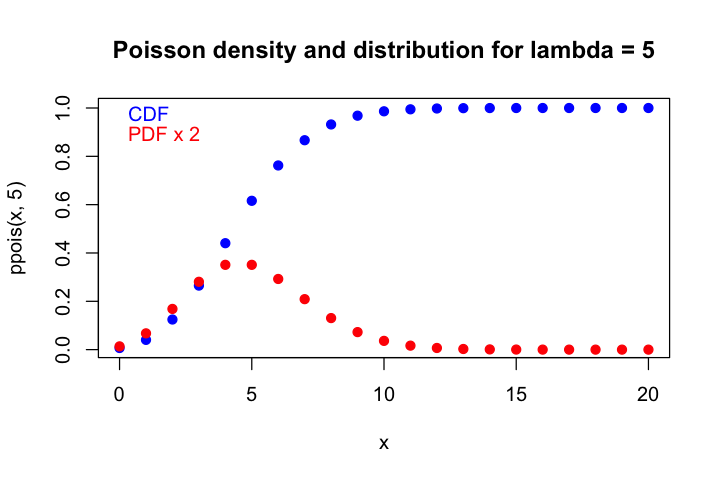

In [12]:
x <- seq(0, 20)
plot(x, ppois(x, 5), col="blue", pch=19)
points(x, dpois(x, 5) * 2, col="red", pch=19)
title(main="Poisson density and distribution for lambda = 5")
legend('topleft', c('CDF', 'PDF x 2'), text.col=c('blue', 'red'),
       bty='n', y.intersp=2)

The standard quantiles are giving by

In [13]:
qpois(c(0.25, 0.5, 0.75), 5)

[1] 3 5 6

* 3 is the smallest count that occurs at least 25% of the time
* 5 is the smallest count that occurs at least 50% of the time
* 6 is the smallest count that occurs at least 75% of the time

Finally, let's run a Poisson simulation with 1,000 trials with
$\lambda = 5$.

In [14]:
poisson_sample <- rpois(1000, 5)
poisson_sample[1:100]

[1]  6  7  6  6  5  7  7  3  6  8  8  5  5  4  2  7  6  5  3  2  4  4  5  1  3
 [26] 10  8  1  6  7  4  5  7  1  7  6  6  7  8  5  2  9 10  1  3  1  4  7  6  4
 [51]  5  7  4 10  5  5  3  2  4  8  3  6  6  4  6  4  5  5  9  4  5  5  6  3  8
 [76]  3  4  2  7  5  2  6  7  2  3  6  5  6  5  3  5  2  6  3  8  5  6  4  4  4

Let's check that our histogram looks anything like our PMF.

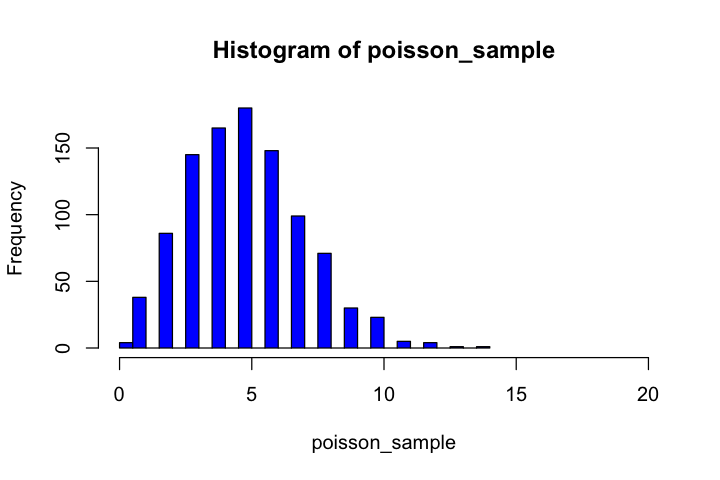

In [15]:
hist(poisson_sample, breaks=20, xlim=c(0, 20), col="blue")

# 3 Continuous Distributions

## 3.1 Normal Distribution

The following functions address the normal distribution.

* `dnorm` - density function
* `pnorm` - cumulative distribution function
* `qnorm` - quantiles
* `rnorm` - random samples

In [16]:
x <- dnorm(c(-3, -2, -1, 0, 1, 2, 3))
round(x, 3)

[1] 0.004 0.054 0.242 0.399 0.242 0.054 0.004

The symmetric character of the normal distribution is apparent 
here. We don't interpret these as probabilities (like we did 
with discrete mass function) since the continuous case represents
an infinitesimal range of the random variable. But we still extract
probabilities from the CDF.

In [17]:
x <- pnorm(c(-3, -2, -1, 0, 1, 2, 3))
round(x, 3)

[1] 0.001 0.023 0.159 0.500 0.841 0.977 0.999

Graphically the normal is the familiar bell curve.

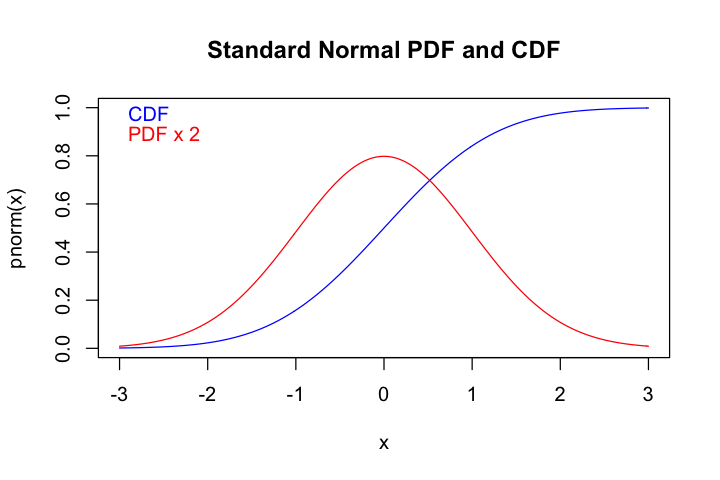

In [18]:
x <- seq(-3, 3, by=0.02)
plot(x, pnorm(x), col='blue', type='l', lty='solid')
lines(x, dnorm(x) * 2, col='red')
title(main="Standard Normal PDF and CDF", ylab="", xlab="")
legend('topleft', c('CDF', 'PDF x 2'), text.col=c('blue', 'red'),
       bty='n', y.intersp=2)

The `qnorm` function provides quantile information.
In other distributions we've shown quantile information for
quarters, i.e. quartile information.  But due to the role
of the normal distribution in the
[Central Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem),
we'll examine quantiles for 90%, 95%, and 97.5% since these are often
referenced in the study of confidence intervals.

In [19]:
x <- qnorm(c(0.5, 0.9, 0.95, 0.975))
round(x, 3)

[1] 0.000 1.282 1.645 1.960

Since the normal distribution is symmetric about the origin,
we expect half to lie on one side of 0 and half on the other
side.  The last number says that 97.5% of the curve lies to
the left of **1.96**.  This is a number we commit to memory
during the study of confidence intervals.

Finally, let's run a normal simulation with 1,000 trials 
using $\mu = 0$ and $\sigma = 1$.

In [20]:
norm_sample <- rnorm(1000)
round(norm_sample[1:100], 2)

[1] -0.29  1.89 -1.57 -0.41  0.83 -0.39  1.51 -0.26  1.22  1.70  0.72 -0.88
 [13] -0.53 -0.14  0.37  0.13 -1.30  0.67 -1.07  0.00 -1.03  2.16  1.09  0.63
 [25]  0.53 -0.13  0.54  1.56 -0.03 -1.75 -0.95  1.47 -0.37 -1.21 -0.30  1.14
 [37]  1.03  0.53 -0.52  0.92  0.59 -2.80 -1.40  0.68  0.51  0.57 -0.77 -2.40
 [49] -1.13 -0.41  1.25  0.07  0.60 -0.21 -0.31  0.26  0.01 -0.62 -0.01  0.00
 [61] -0.57  1.55  0.17  0.71 -0.99  1.89  0.72 -0.65  0.27  0.73  0.27  0.82
 [73] -0.85 -0.10  1.81 -0.38  0.25  0.91  0.71 -0.51 -1.02 -0.93  0.83 -0.81
 [85] -0.42 -0.15  1.51 -1.00  1.36  0.10 -0.30 -0.33  0.01 -1.39  1.35  0.68
 [97]  0.02 -1.34  0.59  0.59

Let's check that our histogram looks anything like our PMF.

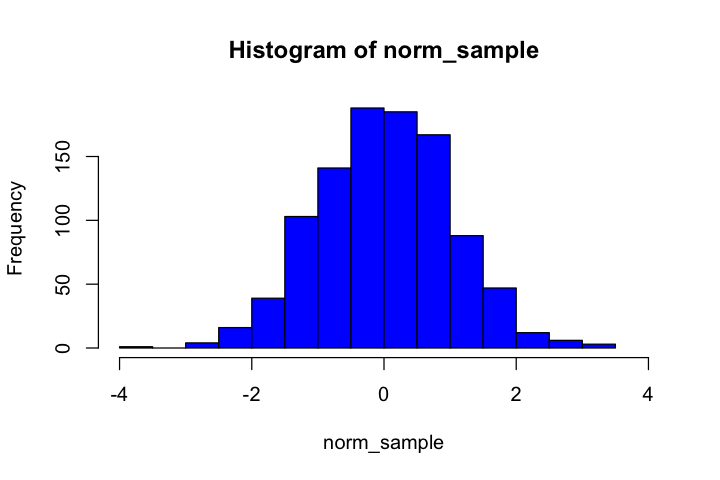

In [21]:
hist(norm_sample, breaks=20, xlim=c(-4, 4), col="blue")

## 3.2 Exponential Distribution

The *exponential distribution* is a continuous distribution that
complements the discrete Poisson distribution that we encountered
above.  Whereas a Poisson random variable represents a count of
events that occur over a fixed unit of time, an exponential
random variable represents the amount of time between one such
event and the next.

The density function for the exponential function is

$$
f_X(x; \lambda) = \lambda e^{-\lambda x}
$$

where the expected wait time is $1/\lambda$  Let's go through
the usual motions with $\lambda = 1/3$.  The exponential function
decreases as x gets larger.

In [22]:
x <- dexp(c(1,2,3,4), 1/3)
round(x, 3)

[1] 0.239 0.171 0.123 0.088

Since the expected wait time is $1/\lambda = 3$ units of time,
we expect the CDF to cross 50% there.

In [23]:
x <- pexp(seq(1,4), 1/3)
round(x, 2)

[1] 0.28 0.49 0.63 0.74

The is the PDF and CDF graphically.

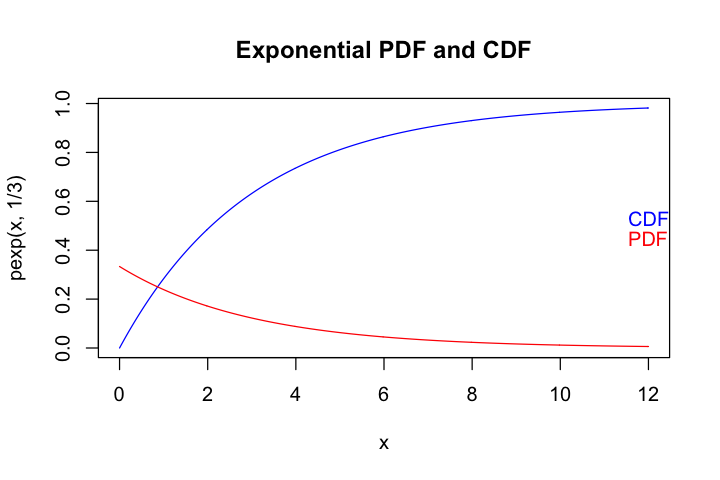

In [35]:
x <- seq(0, 12, by=0.02)
plot(x, pexp(x, 1/3), col='blue', type='l', lty='solid')
lines(x, dexp(x, 1/3), col='red')
title(main="Exponential PDF and CDF", ylab="", xlab="")
legend('right', c('CDF', 'PDF'), text.col=c('blue', 'red'),
       bty='n', y.intersp=2)

Once again, we can see the relationship between the 
CDF $F_X(x; \lambda)$ and the PDF $f_X(x; \lambda)$.

$$
F_X(x; \lambda) = \int_0^x f_X(t; \lambda) dt
$$

The standard quartiles are given by

In [25]:
x = qexp(c(0.25, 0.5, 0.75), 1/3)
round(x, 2)

[1] 0.86 2.08 4.16

Notice that the median is 2.08.  This is an example the median
and the average do not agree, even for a continuous random variable.
These values tell us we should expect a wait time of

* 0.86 time units or less 25% of the time
* 2.08 time units or less 50% of the time
* 4.16 time units or less 75% of the time

Let's generate some exponential distributed time intervals for
a simulated Poisson process.  We'll run an exponential simulation
for 1,000 trials with $\lambda = 1/3$.

In [26]:
exp_sample <- rexp(1000, 1/3)
round(exp_sample[1:100], 2)

[1]  3.29  5.96  6.43  0.12  0.28  0.59  3.19  1.39  4.28  2.31  0.33  5.53
 [13] 12.11  0.39  0.15  3.25  0.57  1.25  1.01  1.14  3.92  1.89  0.64  1.58
 [25]  1.30  0.84  0.16  0.20  1.53 10.31  2.68  3.39  4.80  4.69  0.22  1.94
 [37]  0.42  3.47  6.07  3.41  9.00  1.81  0.73  7.17  5.01  1.11  4.44  5.61
 [49]  1.14  0.12  3.10  9.33  2.03  2.12  2.87  8.95  2.70  9.33  0.15  4.42
 [61]  5.28  2.14  0.84  7.66  1.64  2.93  0.54  0.27  6.05  3.49  2.73  1.85
 [73]  2.13  7.56  6.92  1.35  3.42  0.07  1.02  0.09  0.67  5.50  6.15  1.42
 [85]  1.30  7.36  3.09  0.66 11.60  2.94  6.78  5.21  0.19 13.71  3.07 14.47
 [97]  1.53  1.62  4.99  0.13

Let's check that our histogram looks anything like our PMF.

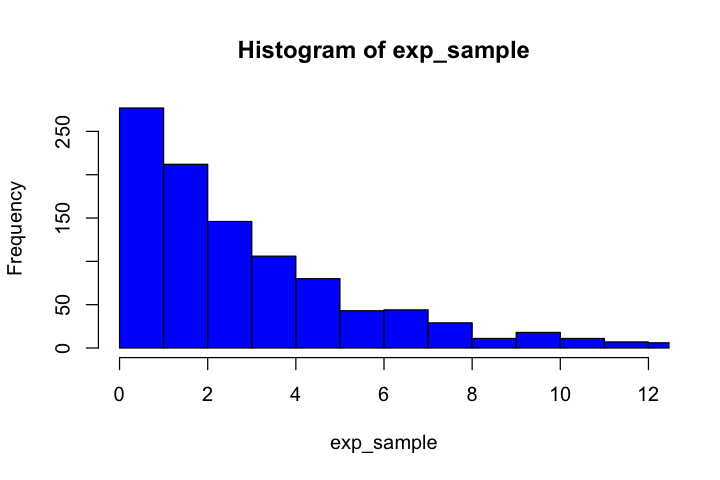

In [27]:
hist(exp_sample, breaks=24, xlim=c(0, 12), col="blue")

## Gamma Distribution

A Gamma random variable is often interpreted as a sum of $r$ independent
exponential random variables with the same parameter $\lambda$.  The
density function is

$$
f_X(x; \lambda, r) = \frac{\lambda}{\Gamma(r)}(\lambda x)^{r-1} e^{-\lambda x}
$$

So we have $r$ Poisson processes with an expected wait time of $1/\lambda$.
Let's continue using our Poisson process from before with an expected wait
time of 3 time units; but this time let's assume we are waiting for 5 of
them (one after another).  So in this particular case, $\lambda = 1/3$ and
$r = 5$.

The R functions related to the Gamma random variable take two parameters:

* `shape` - this corresponds to $r$ in the density function above
* `scale` - this corresponds to $\lambda$ in the density function above

Let's check a few density function values.

In [28]:
x <- dgamma(c(5, 10, 15, 20, 25), shape=5, scale=3)
round(x, 2)

[1] 0.02 0.06 0.06 0.03 0.02

The cumulative distribution function gives a better feel for the distribution.

In [29]:
x <- pgamma(c(5, 10, 15, 20, 25), shape=5, scale=3)
round(x, 2)

[1] 0.03 0.24 0.56 0.79 0.92

This is the PDF and CDF graphically.

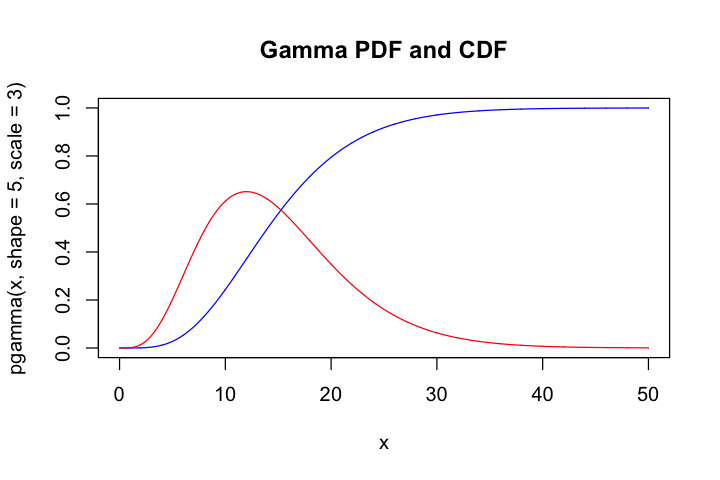

In [30]:
x <- seq(0, 50, by=0.02)
plot(x,  pgamma(x, shape=5, scale=3), col='blue', type='l', lty='solid')
lines(x, dgamma(x, shape=5, scale=3) * 10, col='red')
title(main="Gamma PDF and CDF", ylab=" ", xlab=" ")

The PDF was multiplied by 10 to emphasize its shape.
The quartiles are given by 

In [31]:
x <- qgamma(c(0.25, 0.5, 0.75), shape=5, scale=3)
round(x, 2)

[1] 10.11 14.01 18.82

This means that we can expect a trial (which consists of 5 independent Poisson
processes, each with expected duration of 3 time units) to take less than

* `10.11` time units 25% of the time
* `14.01` time units 50% of the time
* `18.82` time units 75% of the time

Let's simulate 1,000 trials through a random number generator.

In [32]:
g35_sample <- rgamma(1000, shape=5, scale=3)
round(g35_sample[1:100], 2)

[1] 16.22 12.93  6.78  5.85 22.77 16.27 25.52 15.56  7.62 11.08 10.34 17.82
 [13] 28.62 16.53  8.57  7.61 10.73  8.28 14.39 21.09  7.57 12.94 17.83 11.74
 [25]  9.45 29.05  6.34 12.35 15.08 20.67  7.90 15.04 18.55 13.05 14.38 19.84
 [37] 12.49 11.76 21.25 26.32 11.07 18.00  7.93 22.46 17.78 20.07 27.60 15.18
 [49]  7.39 26.59  8.82  8.44 13.82 16.98 11.79 23.07 16.78 16.95 14.96 10.25
 [61] 16.42 23.05 18.05  7.30  5.47  7.33  8.31 27.52 12.95 19.09 18.75 16.50
 [73] 15.43 26.57 19.10  9.03  9.83 12.02 20.39 13.03 13.07 17.52 14.84 17.08
 [85] 13.73 17.43 18.85 11.89 26.97 28.55 11.55 15.44 15.90 30.58 11.65 23.45
 [97] 12.56 10.59 22.86  8.02

Now let's check the histogram.

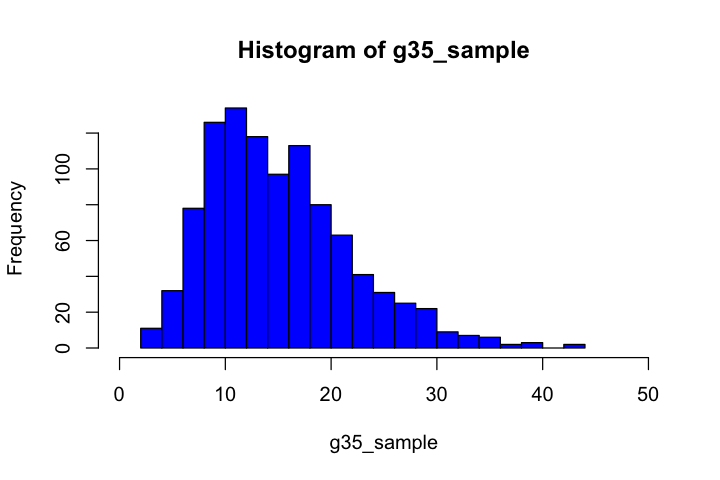

In [33]:
hist(g35_sample, breaks=25, xlim=c(0, 50), col="blue")